# Proyek Analisis Data: [🚲 Bike Rentals Dashboard 🚲]
- **Nama:** [Shafira Maulidina]
- **Email:** [mc009d5x2455@student.devacademy.id]
- **ID Dicoding:** [MC009D5X2455]

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi penyewaan sepeda pada setiap musim berdasarkan diagram pie dan diagram batang, serta musim mana yang memiliki persentase penyewaan tertinggi?
- Bagaimana distribusi penyewaan sepeda berdasarkan tipe penyewa dalam diagram pie dan diagram batang, serta tipe penyewa mana yang memiliki jumlah penyewaan tertinggi?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah column: ", hour_df.duplicated().sum())
print("Jumlah column: ", day_df.duplicated().sum())

Jumlah column:  0
Jumlah column:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_df.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [ ]:
import pandas as pd

hour_df = pd.read_csv("hour.csv")
day_df = pd.read_csv("day.csv")

hour_df.drop(['workingday'], axis=1, inplace=True)
day_df.drop(['workingday'], axis=1, inplace=True)

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

## Exploratory Data Analysis (EDA)

---



### Explore ...

In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [ ]:
import os
import pandas as pd

file_path = "hour.csv"

if not os.path.exists(file_path):
    print(f"File '{file_path}' tidak ditemukan. Pastikan file ada di direktori kerja.")
else:
    hour_df = pd.read_csv(file_path)
    result = hour_df.groupby("yr")[["registered", "casual"]].sum()
    print(result)


    registered  casual
yr                    
0       995851  247252
1      1676811  372765


In [ ]:
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,731.000000,731,731.0,731.000000,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,NaN,12.0,2.0,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,NaN,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,NaN,62.0,710.0,105.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
import pandas as pd

file_path = "day.csv"

try:
    day_df = pd.read_csv(file_path)
    result = (day_df.groupby("season")["cnt"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(2))
    print(result)

except FileNotFoundError:
    print(f"File '{file_path}' tidak ditemukan. Pastikan file ada di direktori kerja.")
except Exception as e:
    print(f"Terjadi error: {e}")

   season      cnt
0       3  1061129
1       2   918589


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
print("Kolom yang tersedia:", hour_df.columns)

# Gunakan nama kolom yang benar ('hr' bukan 'hours')
if 'hr' in hour_df.columns and 'cnt' in hour_df.columns:
    sum_order_items_df = (
    hour_df.groupby("hr")['cnt']
    .sum()
    .reset_index()
    .sort_values(by='cnt', ascending=False)
  )
    print(sum_order_items_df.head())  # Cetak hasil tanpa indentasi berlebihan
else:
    print("Kolom yang dibutuhkan tidak ditemukan dalam hour_df.")

Kolom yang tersedia: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')
    hr     cnt
17  17  336860
18  18  309772
8    8  261001
16  16  227748
19  19  226789


<ipython-input-20-d01012d25d79>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


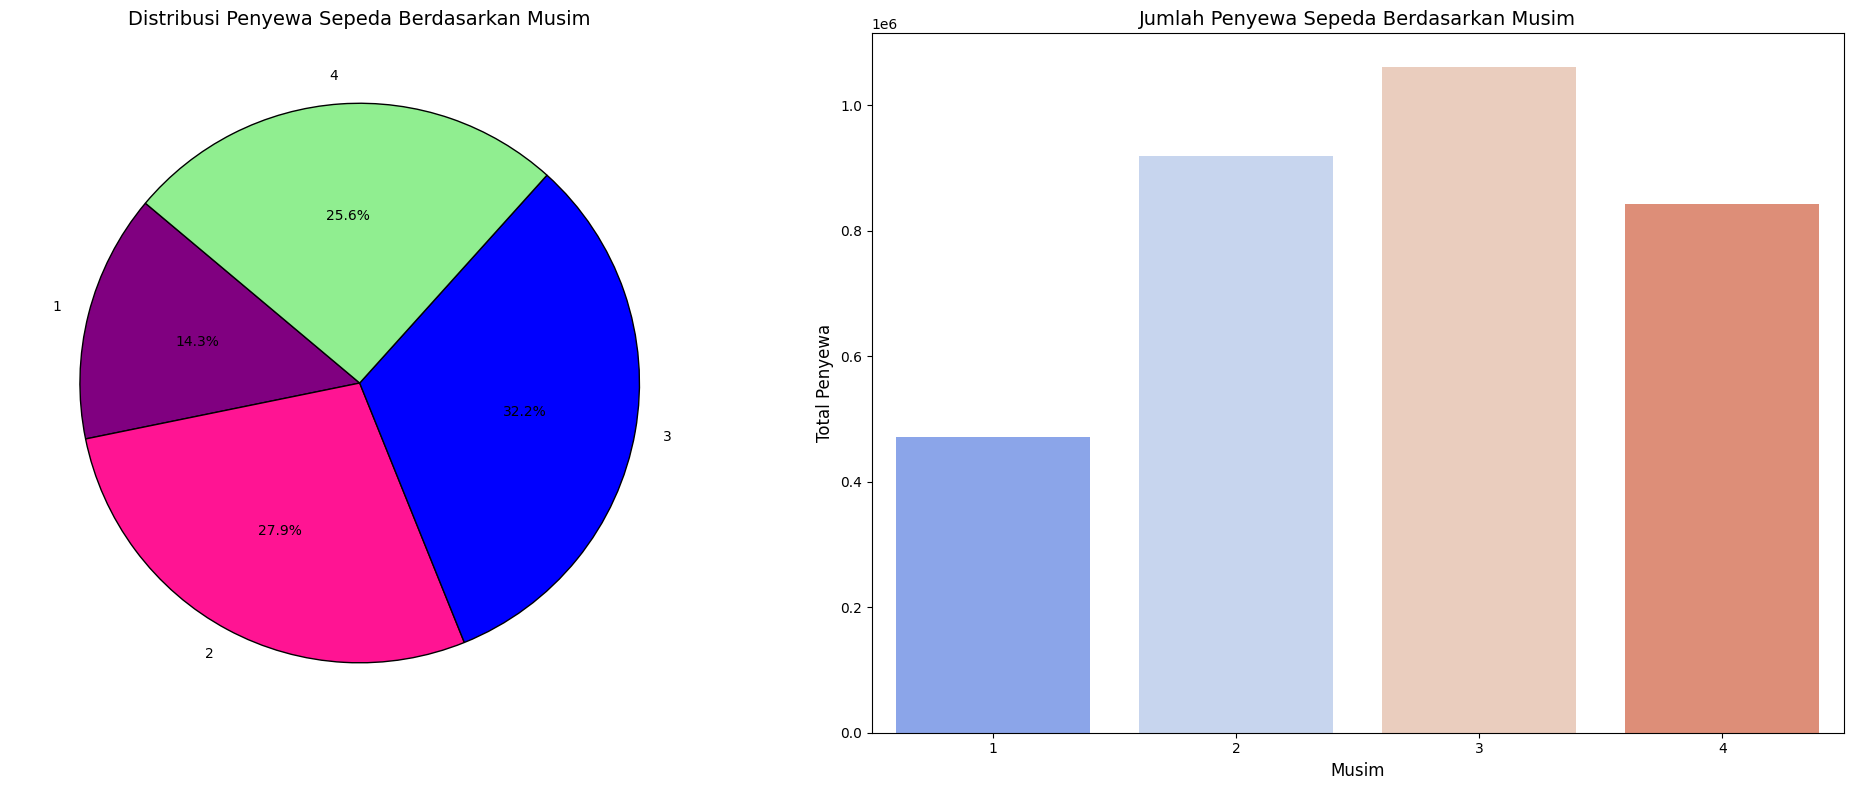

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_path = "day.csv"

try:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File '{file_path}' tidak ditemukan. Pastikan file ada di direktori kerja.")

    day_df = pd.read_csv(file_path)

    season_counts = day_df.groupby("season")["cnt"].sum().reset_index()

    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    axes[0].pie(
        season_counts["cnt"],
        labels=season_counts["season"],
        autopct="%1.1f%%",
        colors=["#800080", "#FF1493", "#0000FF", "#90EE90"],
        startangle=140,
        wedgeprops={"edgecolor": "black"}
    )
    axes[0].set_title("Distribusi Penyewa Sepeda Berdasarkan Musim", fontsize=14)


    sns.barplot(
          data=season_counts,
          x="season",
          y="cnt",
          palette="coolwarm",
          ax=axes[1]
    )
    axes[1].set_xlabel("Musim", fontsize=12)
    axes[1].set_ylabel("Total Penyewa", fontsize=12)
    axes[1].set_title("Jumlah Penyewa Sepeda Berdasarkan Musim", fontsize=14)

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
      print(f"File '{file_path}' tidak ditemukan. Pastikan file ada di direktori kerja.")
except Exception as e:
      print(f"Terjadi error: {e}")

### Pertanyaan 2:

<ipython-input-2-be7fc44c7db7>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=data, palette=colors, ax=axes[1])


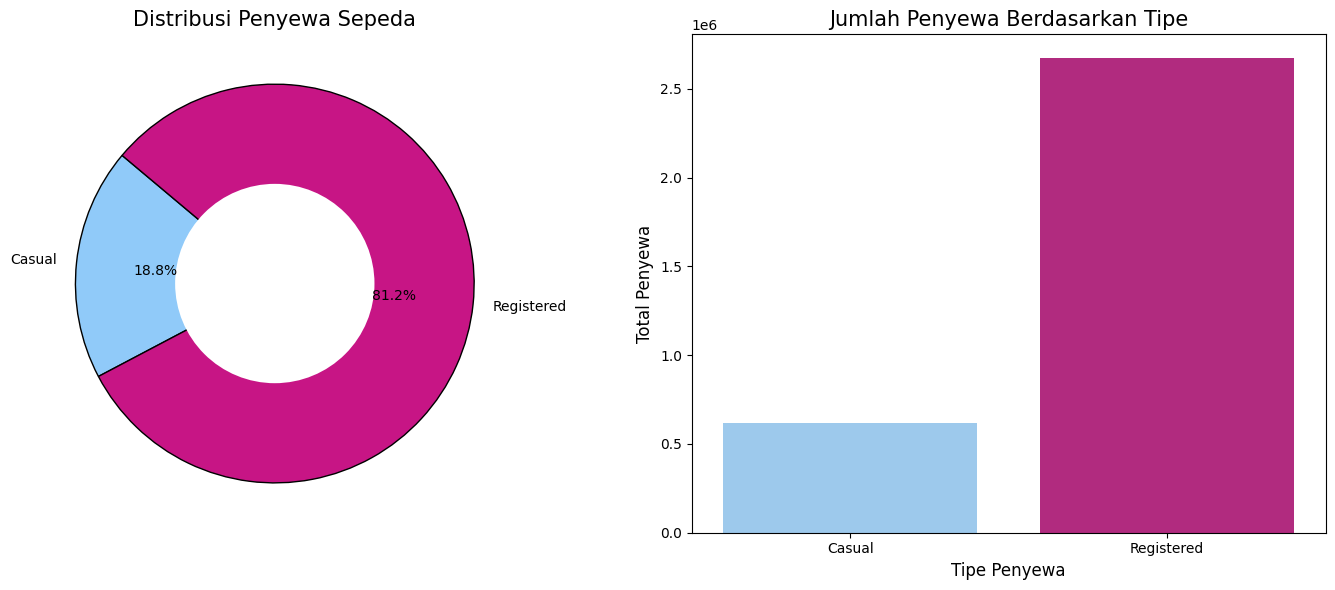

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "day.csv"

try:
    day_df = pd.read_csv(file_path)

    total_casual = day_df['casual'].sum()
    total_registered = day_df['registered'].sum()

    data = [total_casual, total_registered]
    labels = ['Casual', 'Registered']
    colors = ["#90CAF9", "#C71585"]

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    wedges, texts, autotexts = axes[0].pie(
        data, labels=labels, autopct='%1.1f%%', colors=colors,
        startangle=140, wedgeprops={'edgecolor': 'black'}
    )


    center_circle = plt.Circle((0, 0), 0.5, fc='white')
    axes[0].add_artist(center_circle)
    axes[0].set_title("Distribusi Penyewa Sepeda", fontsize=15)

    sns.barplot(x=labels, y=data, palette=colors, ax=axes[1])
    axes[1].set_xlabel("Tipe Penyewa", fontsize=12)
    axes[1].set_ylabel("Total Penyewa", fontsize=12)
    axes[1].set_title("Jumlah Penyewa Berdasarkan Tipe", fontsize=15)

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
      print(f"File '{file_path}' tidak ditemukan. Pastikan file ada di direktori kerja.")
except Exception as e:
      print(f"Terjadi error: {e}")

## Analisis Lanjutan (Opsional)

<ipython-input-48-48f8759b5e98>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  humidity_counts = hour_df.groupby("humidity_category")["cnt"].count().reset_index()
<ipython-input-48-48f8759b5e98>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


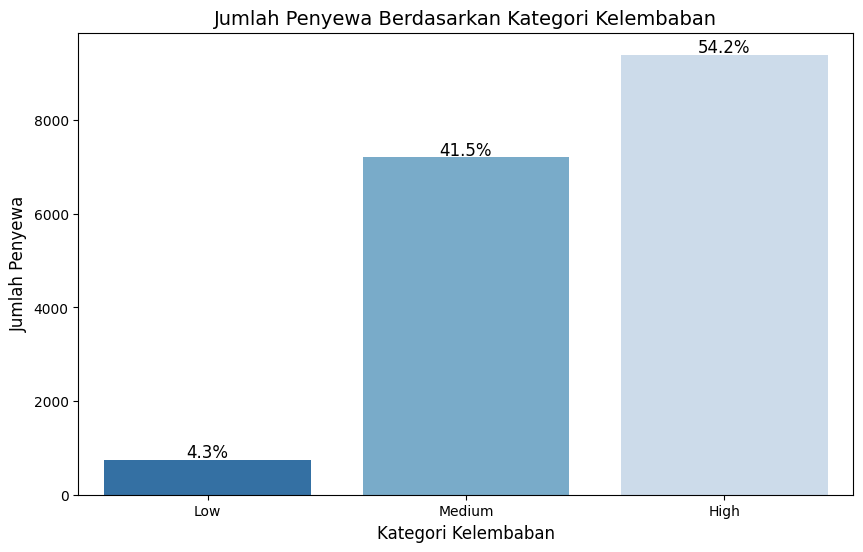

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "hour.csv"

try:

    hour_df = pd.read_csv(file_path)

    if 'humidity_category' not in hour_df.columns:

        hour_df['hum'] = hour_df['hum'] * 100

        bins = [0, 30, 60, 100]
        labels = ['Low', 'Medium', 'High']
        hour_df['humidity_category'] = pd.cut(hour_df['hum'], bins=bins, labels=labels)

        humidity_counts = hour_df.groupby("humidity_category")["cnt"].count().reset_index()

        humidity_counts["percentage"] = (humidity_counts["cnt"] / humidity_counts["cnt"].sum()) * 100

        fig, ax = plt.subplots(figsize=(10, 6))

        sns.barplot(
            data=humidity_counts,
            x="humidity_category",
            y="cnt",
            palette="Blues_r",
            ax=ax
        )

    for index, row in humidity_counts.iterrows():
            ax.text(index, row["cnt"] + 50, f"{row['percentage']:.1f}%", ha="center", fontsize=12)

            ax.set_title("Jumlah Penyewa Berdasarkan Kategori Kelembaban", fontsize=14)
            ax.set_xlabel("Kategori Kelembaban", fontsize=12)
            ax.set_ylabel("Jumlah Penyewa", fontsize=12)

    plt.show()

except FileNotFoundError:
       print(f"File '{file_path}' tidak ditemukan. Pastikan file ada di direktori kerja.")
except Exception as e:
       print(f"Terjadi error: {e}")

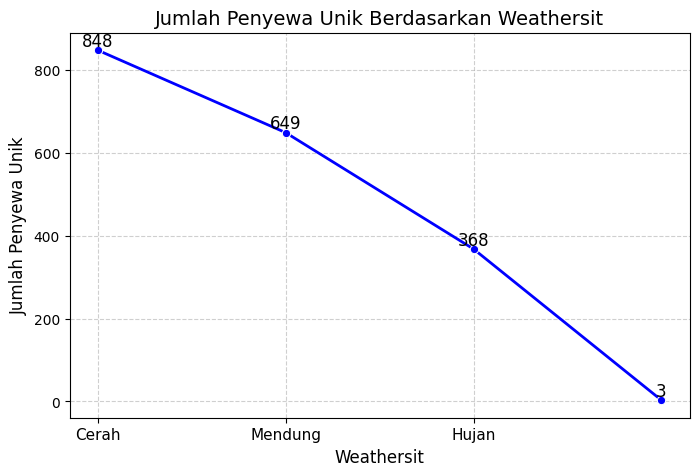

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "hour.csv"

try:
    hour_df = pd.read_csv(file_path)

    weather_counts = hour_df.groupby("weathersit")["cnt"].nunique().reset_index()

    weather_counts = weather_counts.sort_values(by="cnt", ascending=False)

    plt.figure(figsize=(8, 5))

    sns.lineplot(data=weather_counts, x="weathersit", y="cnt", marker="o", color="b", linewidth=2)

    for index, row in weather_counts.iterrows():
        plt.text(row["weathersit"], row["cnt"] + 10, str(row["cnt"]), ha="center", fontsize=12)

    plt.title("Jumlah Penyewa Unik Berdasarkan Weathersit", fontsize=14)
    plt.xlabel("Weathersit", fontsize=12)
    plt.ylabel("Jumlah Penyewa Unik", fontsize=12)
    plt.xticks(ticks=[1, 2, 3], labels=["Cerah", "Mendung", "Hujan"], fontsize=11)  # Label kategori cuaca


    plt.grid(True, linestyle="--", alpha=0.6)


    plt.show()

except FileNotFoundError:
      print(f"File '{file_path}' tidak ditemukan. Pastikan file ada di direktori kerja.")
except Exception as e:
      print(f"Terjadi error: {e}")

## Conclusion

##Conclution pertanyaan 1 :
Dari diagram pie dan diagram batang, terlihat bahwa jumlah penyewaan sepeda bervariasi di setiap musim.
- Musim dengan penyewaan tertinggi: Musim ke-3 memiliki persentase penyewaan sepeda tertinggi dibandingkan musim lainnya.
- Musim dengan penyewaan menengah: Musim ke-2 dan ke-4 memiliki jumlah penyewaan yang cukup tinggi, namun masih lebih rendah dibandingkan musim ke-3.
- Musim dengan penyewaan terendah: Musim ke-1 memiliki jumlah penyewaan sepeda paling sedikit.

Analisis penyebab perbedaan penyewaan antar musim:
- Musim ke-3 kemungkinan merupakan musim panas, di mana cuaca lebih mendukung untuk bersepeda, sehingga banyak orang memanfaatkan layanan penyewaan sepeda.
- Musim ke-1 mungkin memiliki kondisi cuaca yang kurang ideal, seperti suhu yang lebih dingin atau sering hujan, yang mengurangi minat masyarakat untuk menyewa sepeda.
- Musim ke-2 dan ke-4 memiliki tingkat penyewaan yang cukup tinggi, kemungkinan karena kondisi cuaca yang masih cukup nyaman untuk bersepeda meskipun tidak seoptimal musim ke-3.

Rekomendasi strategi untuk meningkatkan penyewaan di musim dengan angka rendah:
- Menawarkan diskon atau promosi khusus di musim dengan penyewaan rendah (misalnya, musim ke-1) untuk menarik lebih banyak pelanggan.
- Menyediakan fasilitas tambahan seperti jas hujan, pemanas tangan, atau promosi layanan untuk menghadapi cuaca yang kurang mendukung.
- Mengadakan event bersepeda musiman untuk meningkatkan minat masyarakat menyewa sepeda pada musim dengan jumlah penyewaan yang lebih sedikit.


##Conclution pertanyaan 2 :
Dari diagram pie dan diagram batang, terlihat bahwa jumlah penyewaan sepeda didominasi oleh penyewa terdaftar dibandingkan dengan penyewa kasual.
- Penyewa terdaftar (Registered): Mendominasi jumlah penyewaan dengan lebih dari 80% dari total peminjaman sepeda.
- Penyewa kasual (Casual): Hanya sekitar 18% dari total penyewaan sepeda.

Analisis penyebab perbedaan jumlah penyewaan berdasarkan tipe penyewa:
- Penyewa terdaftar kemungkinan mendapatkan berbagai keuntungan, seperti harga lebih murah, kemudahan akses, dan program berlangganan, sehingga lebih banyak orang memilih menjadi pengguna tetap.
- Penyewa kasual mungkin merasa bahwa harga sekali sewa lebih mahal dibandingkan pengguna terdaftar, atau mereka hanya menggunakan layanan sesekali tanpa ingin berlangganan.
- Kemungkinan besar, penyewa kasual terdiri dari wisatawan atau pengguna yang hanya mencoba layanan tanpa komitmen jangka panjang.

Rekomendasi strategi untuk meningkatkan jumlah penyewa kasual:
- Memberikan promo khusus bagi penyewa kasual, seperti diskon untuk pemakaian pertama atau paket harga yang lebih menarik untuk pengguna non-terdaftar.
- Menawarkan kemudahan pendaftaran agar pengguna kasual lebih tertarik untuk beralih menjadi penyewa terdaftar.
- Meningkatkan fasilitas dan fleksibilitas layanan bagi penyewa kasual, seperti kemudahan pembayaran tanpa registrasi atau penyewaan berbasis durasi lebih pendek untuk kebutuhan wisatawan atau pengguna sesekali.
